In [1]:
import sys
sys.path.append("../cave_dweller")
import matplotlib.pyplot as plt
%matplotlib inline 

import gen_map
import imp
imp.reload(gen_map)

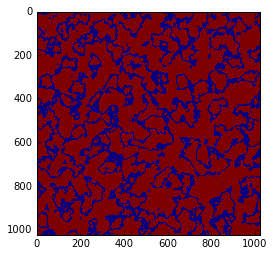

In [3]:
plt.imshow(gen_map.generate_block(seed=1, idx=0, idy=0, map_size=1024))

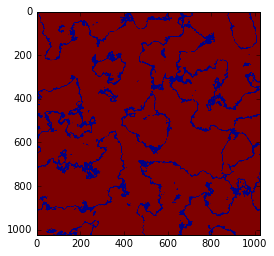

In [4]:
block_generator = gen_map.BlockGenerator(0)
plt.imshow(block_generator.generate_block(idx=0, idy=0, map_size=1024))

In [5]:
import matplotlib
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import math

In [27]:

def my_tune(seed=1, idx=0, idy=0, radius=1, octaves=8, power_of_2_size=7):
    size = int(math.pow(2, power_of_2_size))
    plt.figure(figsize=(10,10))
    plt.imshow(np.rot90(gen_map.gen_tuneable(seed,
                                             idx,
                                             idy,
                                             octaves= octaves,
                                            
                                             map_size=size)), cmap=matplotlib.cm.gray_r, origin='lower')

None

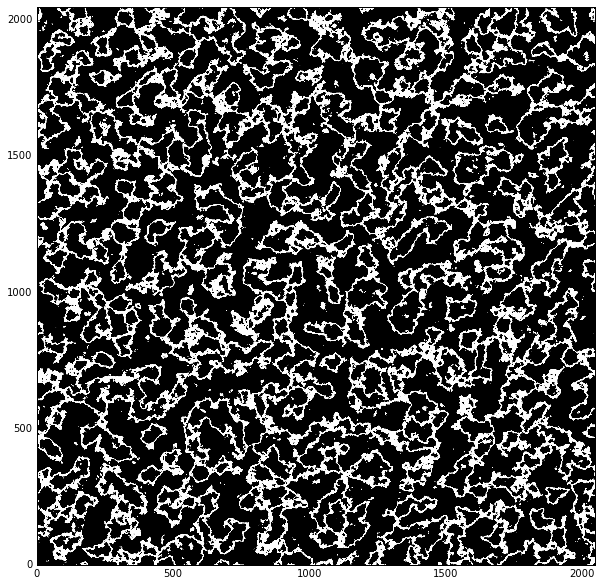

In [28]:
i = interact(my_tune, seed=(-1000, 1000), idx=(-1000, 1000), idy=(-1000, 1000), power_of_2_size=(5, 12), octaves=(1,20))

In [11]:
import ipywidgets
from ipywidgets import interact
def array_gen(seed=1, idx=0, idy=0, octaves=8, size=96):
    #plt.figure(figsize=(10,10))
    array = np.flipud(np.rot90(gen_map.gen_tuneable(seed, idx, idy, octaves = octaves, map_size=size)))
    return array
    #plt.imshow(), cmap=matplotlib.cm.gray_r, origin='lower')

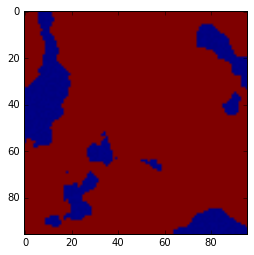

In [12]:
a1 = array_gen()
a2 = array_gen(idx=1)
plt.imshow(a1)

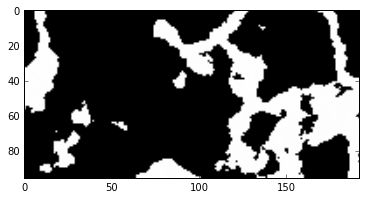

In [13]:
plt.imshow(np.hstack((a1,a2)), cmap=matplotlib.cm.gray_r)

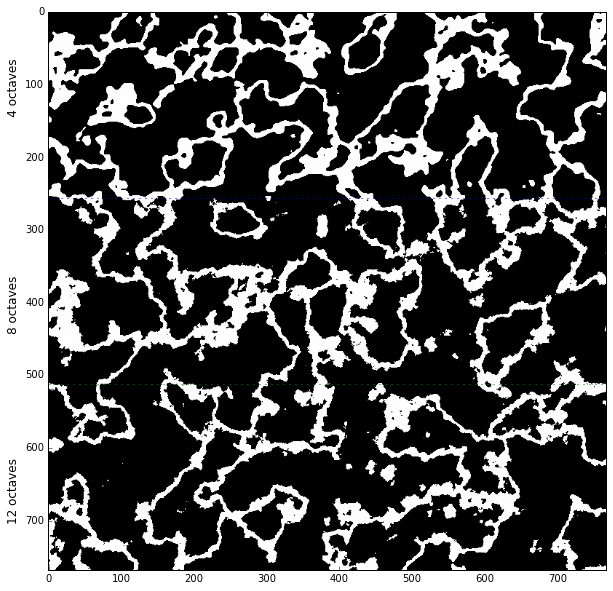

In [16]:
octaves = 4
picture = []
size=256
for y in range(3):
    length = []
    for x in range(3):
        length.append(array_gen(seed=2, idx=x, idy=y, octaves = octaves, size=size))
    octaves += 4
        
    x_length = np.hstack(length)
    picture.append(x_length)


final = np.vstack(picture)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(final, cmap=matplotlib.cm.gray_r)
ax.autoscale(False)
ax.plot(np.arange(size*3), np.full(size*3, size), '--', dashes=[1,5])
ax.plot(np.arange(size*3), np.full(size*3, size*2), '--', dashes=[1,5]) 
ax.set_ylabel('12 octaves                                8 octaves                                         4 octaves', fontsize=12)
#ax.plot(range(11), np.full(11, 11))
plt.show()
    


In [64]:
def snoise3_tune(seed=1, idx=0, idy=0, octaves=8, power_of_2_size=7, min_val=-.2, max_val=0):
    size = int(math.pow(2, power_of_2_size))
    plt.figure(figsize=(10,10))
    plt.imshow(np.rot90(gen_map.tune_block_snoise3(seed,
                                             idx,
                                             idy,
                                             octaves= octaves,
                                             map_size=size,
                                             min_val=min_val,
                                             max_val=max_val)),
               cmap=matplotlib.cm.gray_r, origin='lower')

None

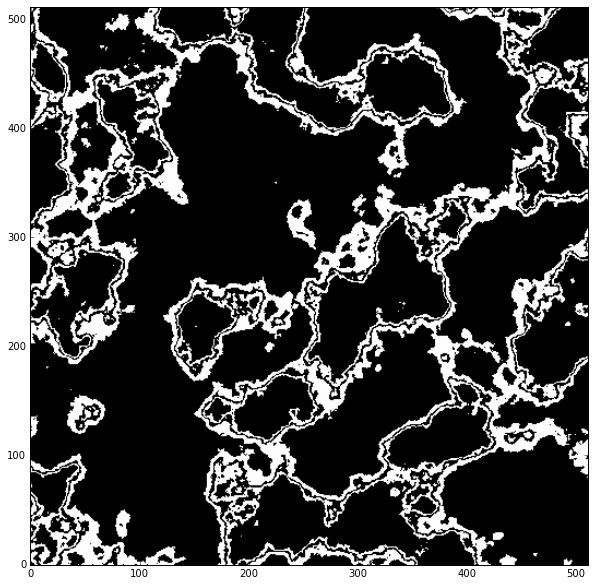

In [74]:
i2 = interact(snoise3_tune, 
              seed=(-1., 1., .0001),
              idx=(-1000, 1000),
              idy=(-1000, 1000),
              power_of_2_size=(5, 12),
              octaves=(1,20),
              min_val=(-1., 1., .1),
              max_val=(-1., 1., .1))

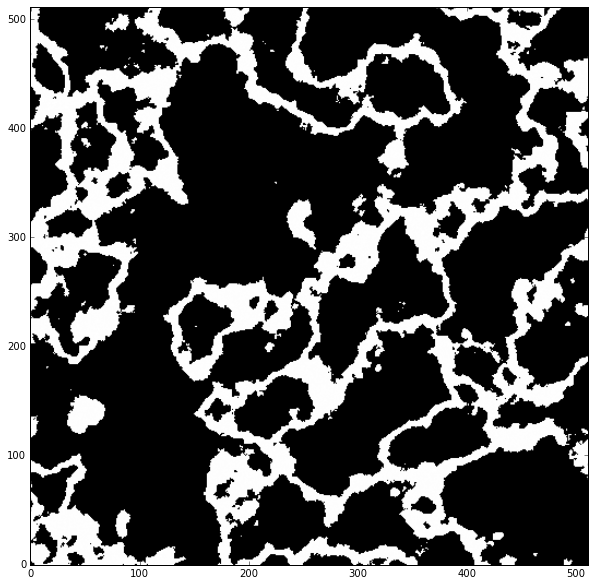

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(gen_map.block_snoise3(seed=1,
                                             idx=0,
                                             idy=0,
                                             map_size=int(math.pow(2, 9)))),
           cmap=matplotlib.cm.gray_r, origin='lower')

In [77]:
%timeit gen_map.block_snoise3(seed=0.0)

100 loops, best of 3: 12.7 ms per loop
